In [2]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [4]:
import sys
sys.path.append('../..')
from model import FinData
from model import train_valid_split
from model import CatboostFinModel
from backtests import Backtest

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = ['Sber', "MTS", "Yandex", "MMK", "Gazprom"]

args = {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [1, 0.4],
        "random_state" : 42,
        "verbose" : 500,
        "early_stopping_rounds" : 500}

dfs = ["../../datasets/" + stock + '_10_min.csv' for stock in df]
backtest = Backtest(strategies=['long'], args=args, dfs=dfs, comissions=[0.0004])

custom_datasets_args = {'start_dt': dt.datetime(2024, 8, 1), 
                        'end_dt': dt.datetime(2024, 12, 1), 
                        'train_size': 3000, 'val_size': 500, 'test_size': 500}
sm = backtest.test_trading(budget=5000, custom_datasets_args=custom_datasets_args, proba_limit=0.5, use_PCA=False)

2025-02-25 21:22:21,950 - INFO - Backtesting started for stock - Sber
2025-02-25 21:22:21,956 - INFO - Train dates: 2024-08-01 07:00:00 - 2024-09-02 13:20:00 | Valid dates: 2024-09-02 13:30:00 - 2024-09-07 14:00:00 | Test dates: 2024-09-07 14:10:00 - 2024-09-12 14:50:00


0:	learn: 0.6901300	test: 0.6910104	best: 0.6910104 (0)	total: 93.1ms	remaining: 4m 39s
500:	learn: 0.5016816	test: 0.5581757	best: 0.5578547 (468)	total: 22.3s	remaining: 1m 51s


In [27]:
sm

[               datetime  budget
 0   2024-09-07 14:10:00    5000
 1   2024-09-07 14:20:00    5000
 2   2024-09-07 14:30:00    5000
 3   2024-09-07 14:40:00    5000
 4   2024-09-07 14:50:00    5000
 ..                  ...     ...
 495 2024-09-12 14:10:00    5000
 496 2024-09-12 14:20:00    5000
 497 2024-09-12 14:30:00    5000
 498 2024-09-12 14:40:00    5000
 499 2024-09-12 14:50:00    5000
 
 [500 rows x 2 columns],
                datetime      budget
 0   2024-09-09 17:40:00  5000.00000
 1   2024-09-09 17:50:00  5000.00000
 2   2024-09-09 18:00:00  5000.00000
 3   2024-09-09 18:10:00  5000.00000
 4   2024-09-09 18:20:00  5000.00000
 ..                  ...         ...
 495 2024-09-14 17:50:00  5147.44146
 496 2024-09-14 18:00:00  5147.44146
 497 2024-09-14 18:10:00  5153.76674
 498 2024-09-14 18:20:00  5153.76674
 499 2024-09-14 18:30:00  5153.76674
 
 [500 rows x 2 columns]]

In [21]:
trading = ['Sber', "MTS", "Yandex", "VTB", "MMK", "Gazprom"]

dates = [dt.datetime(2024, 10, 25) + dt.timedelta(days=i, hours=2) for i in range(2, 3)]

dfs = ["../../datasets/" + stock + "_10_min.csv" for stock in trading]

args = {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "verbose": 0,
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [1, 0.4],
        "random_state" : 42,
        "early_stopping_rounds" : 500}

summ = 10000
hist = []

for date in dates:
        backtest = Backtest(strategies=['long'], args=args, dfs=dfs, comissions=[0.0004])

        custom_datasets_args = {'start_dt': date, 
                                'end_dt': dt.datetime(2024, 12, 1), 
                                'train_size': 3000, 'val_size': 500, 
                                'test_size': 500
                                }
        
        new_m, new_hist = backtest.test_multistock(budget=summ, custom_datasets_args=custom_datasets_args, proba_limit=0.55, use_PCA=False)

        summ += new_m
        hist += new_hist 

print(summ)

MergeError: Incompatible merge dtype, dtype('O') and dtype('<M8[ns]'), both sides must have numeric dtype

In [20]:
trading = ['Sber', "MTS", "Yandex", "VTB", "MMK", "Gazprom"]

dates = [dt.datetime(2024, 10, 15) + dt.timedelta(days=i, hours=2) for i in range(0, 15, 3)]

dfs = ["../../datasets/" + stock + "_10_min.csv" for stock in trading]

args = [{"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [1, 0.35],
        "random_state" : 42,
        "early_stopping_rounds" : 500, 
        "verbose" : 0}, 
        {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [0.35, 1],
        "random_state" : 42,
        "early_stopping_rounds" : 500, 
        "verbose" : 0}]

summ = 10000
hist = []

for date in dates:
        backtest = Backtest(strategies=['long-short'], args=args, dfs=dfs, comissions=[0.0004])

        custom_datasets_args = {'start_dt': date, 
                                'end_dt': dt.datetime(2024, 12, 1), 
                                'train_size': 2000, 'val_size': 500, 
                                'test_size': 300
                                }
        
        new_m, new_hist = backtest.test_multistock(budget=summ, custom_datasets_args=custom_datasets_args, proba_limit=0.55, use_PCA=True)

        summ += new_m
        hist += new_hist 

print(summ)

2025-02-25 15:29:05,324 - INFO - Training long model starterd for stock - Sber
2025-02-25 15:29:05,324 - INFO - Train dates: 2024-10-15 04:00:00 - 2024-11-04 05:30:00 | Valid dates: 2024-11-04 05:40:00 - 2024-11-09 08:10:00 | Test dates: 2024-11-09 08:20:00 - 2024-11-12 08:10:00
2025-02-25 15:29:22,562 - INFO - Training long model ended with loss {'learn': {'Logloss': 0.4421620478695895}, 'validation': {'Logloss': 0.5752965862579954}}
2025-02-25 15:29:34,727 - INFO - Training short model starterd for stock - Sber
2025-02-25 15:29:34,729 - INFO - Train dates: 2024-10-15 04:00:00 - 2024-11-04 05:30:00 | Valid dates: 2024-11-04 05:40:00 - 2024-11-09 08:10:00 | Test dates: 2024-11-09 08:20:00 - 2024-11-12 08:10:00
2025-02-25 15:29:51,292 - INFO - Training short model ended with loss {'learn': {'Logloss': 0.4586804338925722}, 'validation': {'Logloss': 0.515218389014524}}
2025-02-25 15:29:57,936 - INFO - Training long model starterd for stock - MTS
2025-02-25 15:29:57,937 - INFO - Train date

KeyboardInterrupt: 

In [105]:
import numpy as np

In [106]:
np.argsort([(1, 2, 3), (3, 2, 1), (2, 3, 4)])

array([[0, 1, 2],
       [2, 1, 0],
       [0, 1, 2]], dtype=int64)

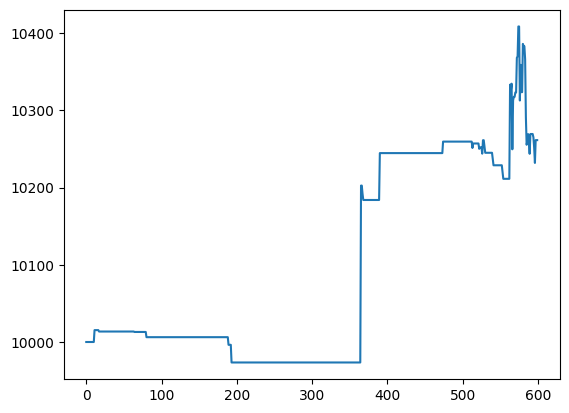

In [90]:
plt.plot(hist)